In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, random_split
from torchvision.datasets import MNIST
import matplotlib.pyplot as plt

In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

Using device: cuda


## 1. Setting up the dataset

### 1.1 Downloadinng the dataset

In [3]:
train_dataset = MNIST(".", train=True, download=True, transform=transforms.ToTensor())
test_dataset = MNIST(".", train=False, download=True, transform=transforms.ToTensor())

### 1.2 explroe the dataset

In [4]:
f"size of train dataset: {len(train_dataset)}, size of test dataset: {len(test_dataset)}"

'size of train dataset: 60000, size of test dataset: 10000'

In [5]:
print(train_dataset[0][0].shape) # channel, height, width
print(train_dataset[0][0])

torch.Size([1, 28, 28])
tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000,

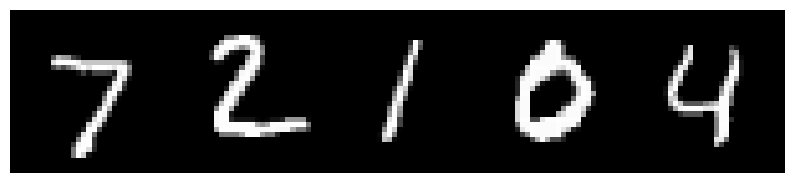

In [6]:
test_imgs = torch.stack([test_dataset[i][0] for i in range(5)])

grid = torchvision.utils.make_grid(test_imgs, nrow=5)
            
plt.figure(figsize=(10, 10))
plt.imshow(grid.permute(1, 2, 0).cpu().numpy(), cmap='gray')
plt.axis('off')
plt.show()

### 1.3 Prepare the data

In [7]:
# can we do better than just randomly splitting the dataset?
validation_data, train_data = random_split(train_dataset, [10000, 50000])

In [8]:
BATCH_SIZE = 64

In [9]:
train_dataloader = DataLoader(train_data, batch_size=BATCH_SIZE)
val_dataloader = DataLoader(validation_data, batch_size=BATCH_SIZE)
test_dataloader = DataLoader(test_dataset, batch_size=BATCH_SIZE)

## 2. Building the model

### 2.1 Components of the model

- Layers
  - Linear
  - Conv2D
  - MaxPooling2D
  - Flatten
  - Dropout
- Activation function
  - ReLU
  - Sigmoid
  - tanh
  - softmax
- Loss function
  - Binary Crossentropy
  - Mean Squared Error
- Optimizer
  - SGD
  - Adam
  - RMSprop

### 2.2 Layers

Here are some examples of layers that can be used in a ML model.

1. Linaer

In [10]:
x = torch.randn(1, 10)
print("before:")
print(x)
x = nn.Linear(10, 5)(x)
print("after:")
print(x)

before:
tensor([[-0.9903, -0.5521, -0.5576,  0.0734,  0.7180, -0.0330, -0.2172,  0.4085,
          0.8963,  0.0268]])
after:
tensor([[-0.1614,  0.3175,  0.0776,  0.7727,  0.3536]],
       grad_fn=<AddmmBackward0>)


2. Flatten

In [11]:
x = torch.arange(6).reshape(2, 3)
print("before:")
print(x)
x = torch.flatten(x)
print("after:")
print(x)

before:
tensor([[0, 1, 2],
        [3, 4, 5]])
after:
tensor([0, 1, 2, 3, 4, 5])


### 2.3 Activation functions

1. ReLU (Rectified Linear Unit)  
observe that any negative input will be replaced by 0.

![ReLU](assets/relu.png)

In [12]:
x = torch.randn(1, 10)
print("before:")
print(x)
x = F.relu(x)
print("after:")
print(x)

before:
tensor([[-1.8523, -0.5663, -0.0242, -1.9180,  0.9811, -0.3890,  1.5606,  0.2084,
          0.1410,  0.1278]])
after:
tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.9811, 0.0000, 1.5606, 0.2084, 0.1410,
         0.1278]])


2. Sigmoid

![Sigmoid](assets/sigmoid.png)

In [13]:
x = torch.randn(1, 10)
print("before:")
print(x)
x = nn.Sigmoid()(x)
print("after:")
print(x)

before:
tensor([[ 1.4591,  0.4664, -0.4483,  2.2686,  0.5423,  1.9903, -0.1950,  0.1878,
         -0.1937,  1.7977]])
after:
tensor([[0.8114, 0.6145, 0.3898, 0.9062, 0.6323, 0.8798, 0.4514, 0.5468, 0.4517,
         0.8579]])


3. Other activation functions

![Other activation functions](assets/activations.png)

### 2.4 Define the model

You can play around with the forward pass of the model by changing the layers and activation functions!

Some ideas:
- Add more layers (does deeper model means better performance?)
- Change the activation functions (does it change the behavior of the model?)
- Change the number of neurons in the layers

In [14]:
class SimpleFeedForward(nn.Module):
    def __init__(self, hidden_1, hidden_2):
        super().__init__()
        self.flatten = nn.Flatten()
        self.model = nn.Sequential(
            nn.Linear(28*28, hidden_1),
            nn.ReLU(),
            nn.Linear(hidden_1, hidden_2),
            nn.ReLU(),
            nn.Linear(hidden_2, 10)
        )
        
    def forward(self, x):
        x = self.flatten(x)
        x = self.model(x)
        return x

### 2.5 Optimizers

![optimizers gif](assets/optimizers.gif)  
  
_Source: https://github.com/j-w-yun/optimizer-visualization_

### 2.6 Loss functions

# TODO

## 3. Training the model

### 3.1 Initialize the model

In [63]:
model = SimpleFeedForward(64, 32)# initialize model
model.to(device) # move model to GPU if available

SimpleFeedForward(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (model): Sequential(
    (0): Linear(in_features=784, out_features=64, bias=True)
    (1): ReLU()
    (2): Linear(in_features=64, out_features=32, bias=True)
    (3): ReLU()
    (4): Linear(in_features=32, out_features=10, bias=True)
  )
)

### 3.2 Define loss function and optimizer

Just like the model, you can play around with the loss function and optimizer!

ideas:
- Change the loss function (e.g. MSE, Categorical Crossentropy)
- Change the optimizer (e.g. SGD, RMSprop)
- Change the learning rate (how does it affect the training?)

In [64]:
loss_fn = nn.CrossEntropyLoss()

#optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
optimizer = torch.optim.SGD(model.parameters(), lr=0.005)

### 3.3 Define the training loop

In [65]:
EPOCHS = 20

In [66]:
def train_one_epoch(model, dataloader, loss_fn, optimizer):
    
    running_losses = 0 # store the loss value for plotting
    
    model.train() # what is this line doing?
    
    for (X, y) in dataloader:
        
        # move data to GPU if available
        # This might perform worse because of the overhead of moving data to GPU
        X = X.to(device)
        y = y.to(device)

        y_hat = model(X)
        loss = loss_fn(y_hat, y)
        
        optimizer.zero_grad() # why do we need to set the gradients to zero?
        loss.backward()
        optimizer.step()
        
        running_losses += loss
    
    return running_losses / len(dataloader)

### 3.4 Train the model

In [67]:
train_loss_list = []
val_loss_list = []
accuracy_list = []

for epoch in range(EPOCHS):
    train_loss = train_one_epoch(model, train_dataloader, loss_fn, optimizer)
    
    model.eval()
    
    with torch.no_grad(): # disable gradient calculation since we are not training
        for (X, y) in val_dataloader:
            
            X = X.to(device)
            y = y.to(device)
            
            y_hat = model(X)
            validation_loss = loss_fn(y_hat, y)

            # calculate accuracy
            accuracy = (y_hat.argmax(1) == y).type(torch.float).mean().item()

    print(f"Epoch {epoch+1}, train loss: {train_loss}, validation loss: {validation_loss}, validation accuracy: {accuracy * 100}%")
    
    train_loss_list.append(train_loss)
    val_loss_list.append(validation_loss)
    accuracy_list.append(accuracy)

            

Epoch 1, train loss: 2.1883316040039062, validation loss: 2.088020086288452, validation accuracy: 31.25%
Epoch 2, train loss: 1.4849650859832764, validation loss: 1.2589185237884521, validation accuracy: 75.0%
Epoch 3, train loss: 0.7882968783378601, validation loss: 1.0262806415557861, validation accuracy: 81.25%
Epoch 4, train loss: 0.5773876309394836, validation loss: 0.9433178901672363, validation accuracy: 81.25%
Epoch 5, train loss: 0.4900440573692322, validation loss: 0.8671884536743164, validation accuracy: 81.25%
Epoch 6, train loss: 0.43949273228645325, validation loss: 0.8019351959228516, validation accuracy: 81.25%
Epoch 7, train loss: 0.40500158071517944, validation loss: 0.7537376880645752, validation accuracy: 87.5%
Epoch 8, train loss: 0.3795868456363678, validation loss: 0.7206239700317383, validation accuracy: 87.5%
Epoch 9, train loss: 0.35976657271385193, validation loss: 0.6949281096458435, validation accuracy: 87.5%
Epoch 10, train loss: 0.3435707986354828, valida

### 3.5 Test the model

In [68]:
total_correct = 0
total_loss = 0

for idx, (X, y) in enumerate(test_dataloader):
    
    X = X.to(device)
    y = y.to(device)
    
    y_hat = model(X)
    total_loss += loss_fn(y_hat, y)

    # calculate accuracy
    total_correct += (y_hat.argmax(1) == y).type(torch.float).sum().item()

print(f"Test loss: {total_loss/(idx+1)}, test accuracy: {total_correct/len(test_dataset) * 100:.2f}%")

Test loss: 0.24263355135917664, test accuracy: 92.91%


## 4. Analyzing the results

### 4.1 Visualize the training loss and validation loss

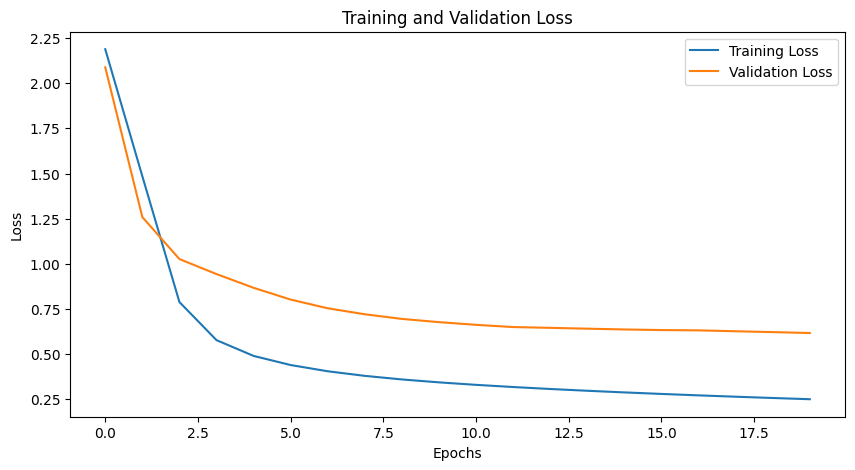

In [69]:
plt.figure(figsize=(10, 5))
plt.plot(range(EPOCHS), [loss.item() for loss in train_loss_list], label='Training Loss')
plt.plot(range(EPOCHS), [loss.item() for loss in val_loss_list], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

### 4.2 Visualize the validation accuracy

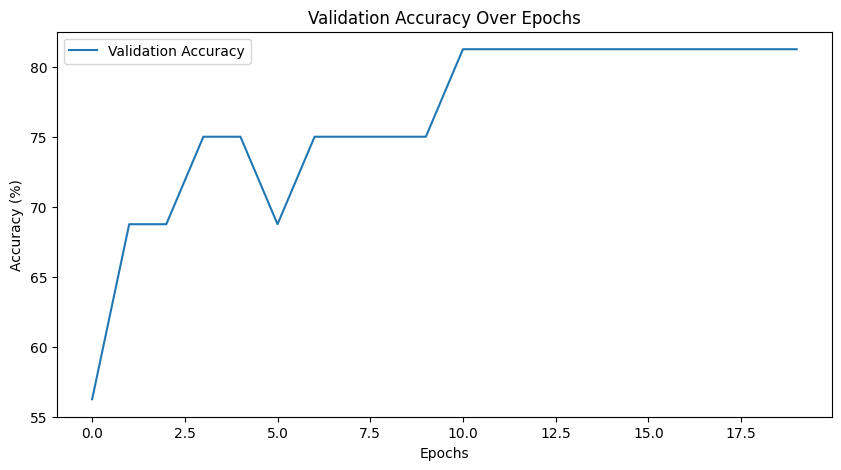

In [47]:
plt.figure(figsize=(10, 5))
plt.plot(range(EPOCHS), [acc * 100 for acc in accuracy_list], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.title('Validation Accuracy Over Epochs')
plt.legend()
plt.show()

### 4.3 Check misclassified images

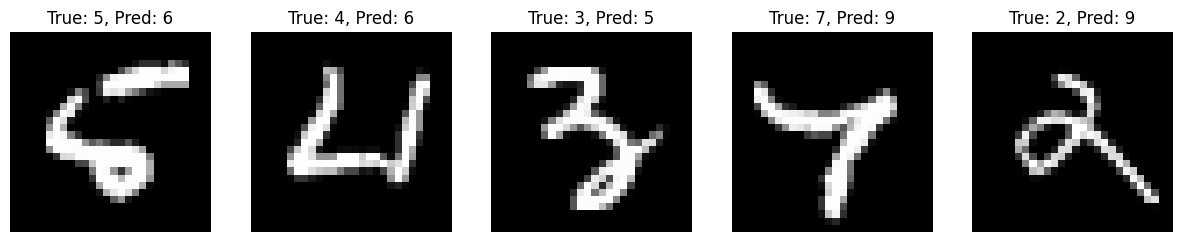

In [48]:
misclassified_images = []
misclassified_labels = []
misclassified_preds = []

model.eval()

with torch.no_grad():
    for X, y in test_dataloader:
        X = X.to(device)
        y = y.to(device)
        
        y_hat = model(X)
        preds = y_hat.argmax(1)
        
        misclassified_indices = (preds != y).nonzero(as_tuple=True)[0]
        
        for idx in misclassified_indices:
            misclassified_images.append(X[idx].cpu())
            misclassified_labels.append(y[idx].cpu().item())
            misclassified_preds.append(preds[idx].cpu().item())

# Plot some misclassified images
num_images_to_plot = 5
fig, axes = plt.subplots(1, num_images_to_plot, figsize=(15, 15))

for i in range(num_images_to_plot):
    axes[i].imshow(misclassified_images[i].squeeze(), cmap='gray')
    axes[i].set_title(f"True: {misclassified_labels[i]}, Pred: {misclassified_preds[i]}")
    axes[i].axis('off')

plt.show()

### 4.4 Save the model

In [26]:
torch.save(model.state_dict(), "model/mnist_model.pth")